# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Martín Calvo D
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
from numpy import linalg as la
from scipy.integrate import solve_ivp,quad
import matplotlib.pyplot as plt


# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

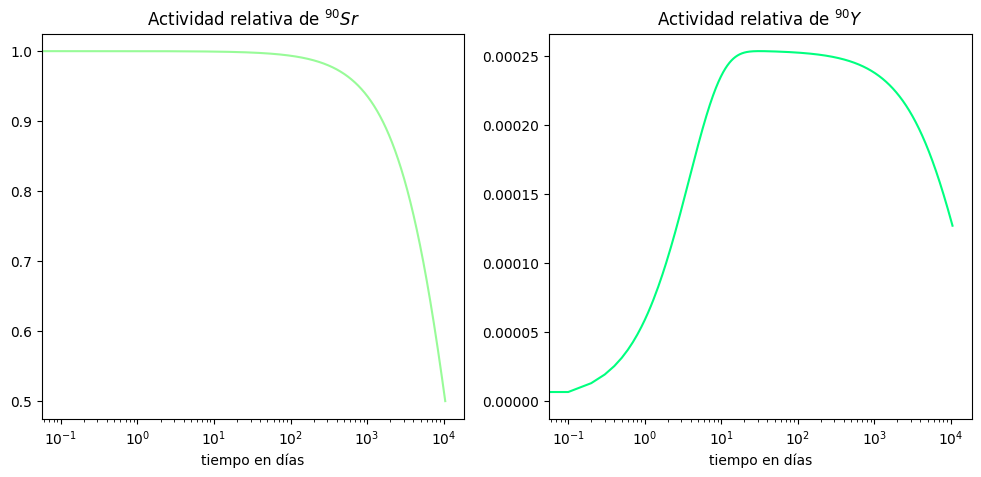

In [ ]:
hlsr=28.78 *365 #half life de Sr, en días
hly=2.67  #Half life de Y
h=0.1  #paso para ahorita hacer Euler

csr=np.log(2)/hlsr
cy=np.log(2)/hly

def f(t,N):
 dN=np.zeros_like(N)
 dN[0]=-csr*N[0]
 dN[1]=-cy*N[1] + csr*N[0]
 return dN

t=np.arange(0,hlsr,h)
N=np.zeros((2, len(t)))
N[:,0]=[1,0] #valores iniciales, empieza habiendo una unidad de Sr y 0 de Y


for i in range(1,len(t)):
  N[:,i]=N[:,i-1] + h*f(t[i-1], N[:,i-1])

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].semilogx(t,N[0], color="palegreen")
ax[0].set(title="Actividad relativa de $^{90}Sr$", xlabel="tiempo en días")
ax[1].semilogx(t,N[1], color="springgreen")
ax[1].set(title="Actividad relativa de $^{90}Y$", xlabel="tiempo en días")
plt.show()

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

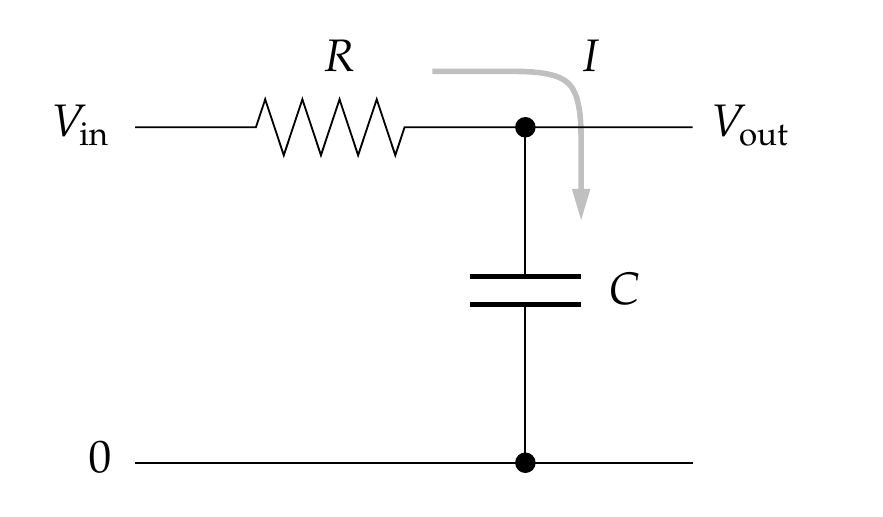

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

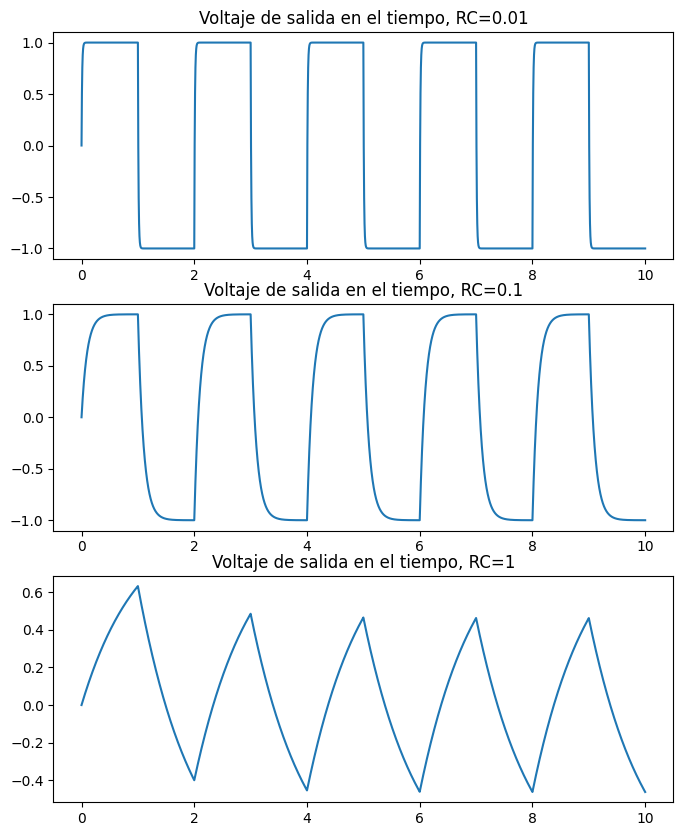

In [ ]:

corch=lambda x: int(x)
def Vi(t):
  if corch(t)%2==0:
    return 1
  elif corch(t)%2!=0:
    return -1
RC=[0.01,0.1,1]

def f(vo,t,RC):
  return (1/RC)*(Vi(t)-vo)

h=1e-4
t=np.arange(0,10,h)
vo=np.zeros_like(t)

vo[0]=0 #redundante pero vale la pena que quede claro que esa es la condición inicial

fig,ax=plt.subplots(3,1,figsize=(8,10))
for i in range(len(RC)):
  for j in range(1,len(t)):
    vo[j]=vo[j-1] + h*f(vo[j-1], t[j-1],RC[i])
  ax[i].plot(t, vo, label="$V_{out}$")
  ax[i].set(
      title=(f"Voltaje de salida en el tiempo, RC={RC[i]}"))


# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

Tasa de crecimiento1


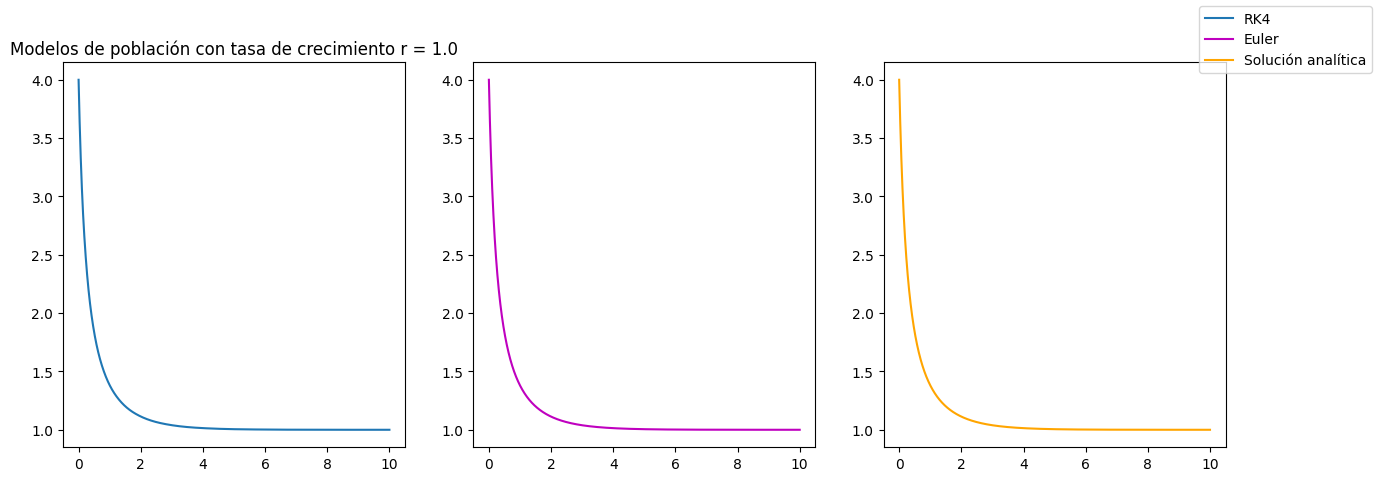

El error relativo del método de Euler respecto a la solución analítica, con h=0.0001 y r=1.0 es del 1.45e-03 %
El error relativo del método de RK4 respecto a la solución analítica, con h=0.0001 y r=1.0 es del 3.491979e-02 %


In [ ]:

def anal(t,P0,r,K):
  return (K*P0*np.exp(r*t))/(K+P0*(np.exp(r*t)-1))  #Solución analítica

h=1e-4
t=np.arange(0,10+h, h)
K=1 #k cualquiera
P0=np.array([4]) #Aquí la definí como array para que solve:ivp lo aceptara
r=float(input("Tasa de crecimiento"))

def my_logistic_eq(t, P, r, K) :
  return r*P*(1-P/K)


def mle(t,P):
  return my_logistic_eq(t,P,r,K)  #Función solo dependiente de P y t, para que sirvan los métodos


sol=solve_ivp(mle,(t[0],t[-1]),P0, t_eval=t)
P=np.zeros_like(t)
P[0]=4 #Población inicial
for i in range(1, len(t)):
  P[i]=P[i-1]+h*mle(t[i-1],P[i-1])

fig,ax=plt.subplots(1,3, figsize=(15,5))
ax[0].plot(t,sol.y[0], label="RK4")
ax[1].plot(t,P, color="m", label="Euler")
ax[2].plot(t,anal(t,P0,r,K),color="orange", label="Solución analítica")
fig.legend()
ax[0].set(title=(f"Modelos de población con tasa de crecimiento r = {r}"))
plt.show()

erroreuler=np.mean(abs(P-anal(t,P0,r,K))/anal(t,P0,r,K))
errorsi=np.mean(abs(sol.y[0]-anal(t,P0,r,K))/anal(t,P0,r,K))


print(f"El error relativo del método de Euler respecto a la solución analítica, con h={h} y r={r} es del {erroreuler*100:.2e} %")
print(f"El error relativo del método de RK4 respecto a la solución analítica, con h={h} y r={r} es del {errorsi*100:2e} %")


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [16]:
h=0.001  #TOCA VOLVER A HACER ESTO A MIRAR SI LA INTEGRAL ESTÁ BIEN
l=1 #no especifican l entonces le tocó ser 1
t=np.arange(0,5, h)

u1=np.zeros_like(t)
u2=np.zeros_like(t)
uprima=np.zeros_like(t)

def f(t,u):
  return -9.78*np.sin(u)/l

def F(t,U):
  dU=np.zeros_like(U, dtype=float)
  dU[0]=U[1]
  dU[1]=f(t,U[0])  #la función que definí antes pasa a ser ese elemento de dU
  return dU

inicial1=np.array([np.pi/2,0])
sol1=solve_ivp(F, t_span=(t[0],t[-1]), y0=inicial1, t_eval=t)
u1=sol1.y[0]
uprima1=sol1.y[1]
                                #Una solución para cada una de las condiciones iniciales especificadas
inicial2=np.array([1,0])
sol2=solve_ivp(F, t_span=(t[0],t[-1]), y0=inicial2, t_eval=t)
u2=sol2.y[0]
uprima2=sol2.y[1]

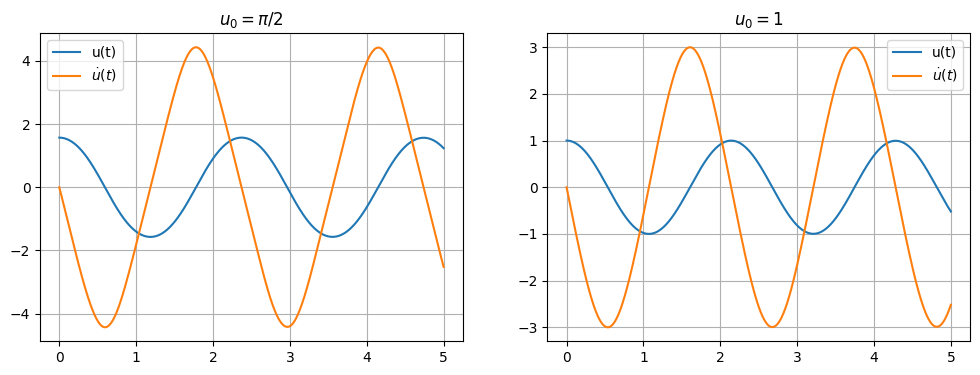

(np.float64(2.372), np.float64(2.142))

In [26]:

t=sol1.t
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t,u1, label="u(t)")
ax[0].plot(t,uprima1, label="$\dot{u}(t)$")
ax[0].grid()
ax[0].set(title="$u_0 = \pi/2$")
ax[0].legend()


ax[1].plot(t,u2, label="u(t)")
ax[1].plot(t,uprima2, label="$\dot{u}(t)$")
ax[1].grid()
ax[1].set(title="$u_0 = 1$")
ax[1].legend()
plt.show()


for i in range(len(t)):  #Este ciclo no es demasiado eficiente pero encuentra el periodo
  if u1[i]==max(u1):
    t0_1=t[i]

  if u1[i]==min(u1):
    tf_1=t[i]

  if u2[i]==max(u2):
    t0_2=t[i]

  if u2[i]==min(u2):
    tf_2=t[i]


T1=2*abs(tf_1-t0_1)
T2=2*abs(tf_2-t0_2)

print(T1,T2)

(2.3689127089753406, 2.1403547864526784)

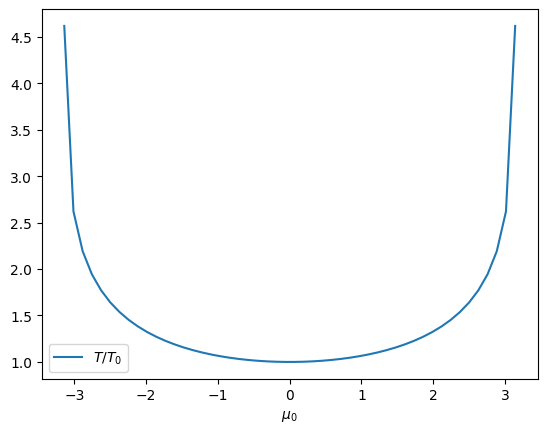

In [25]:
ui=np.linspace(-np.pi,np.pi)

def K(alpha):
    integrando = lambda z: 1.0 / np.sqrt((1 - z**2)*(1 - alpha*z**2))
    return quad(integrando,0,1-1e-6)[0]

def T(u,l):
  T0=2*np.pi*(l/9.78)**(1/2)
  alpha=np.sin(u/2)**2
  ka=K(alpha)
  Te=(T0*2*ka)/np.pi
  return Te,T0


tarray=np.zeros_like(ui)
for i in range(len(ui)):
  tarray[i]=T(ui[i],1)[0]/T(ui[i],1)[1]  #T/T_0 como función de mu



plt.plot(ui,tarray, label="$T/T_0$")
plt.xlabel("$\mu _0$")
plt.legend()

print(T(np.pi/2,1)[0],T(1,1)[0]) #Se puede ver que son muy cercanas a las respuestas numéricas


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

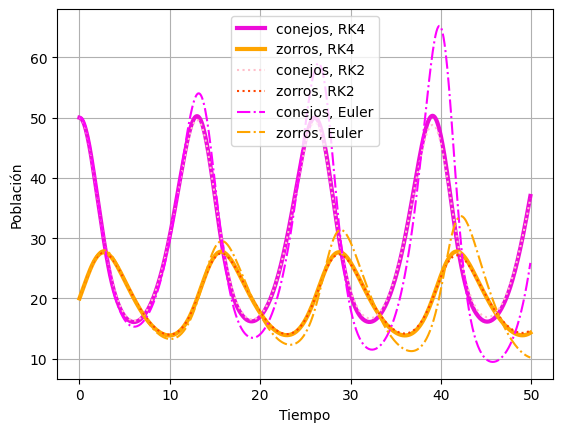

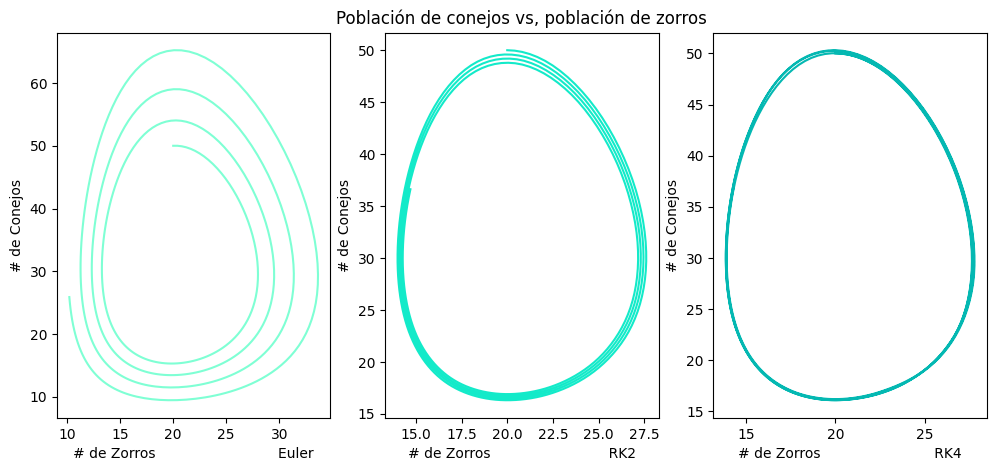

In [ ]:
alpha=0.8  #reproducción conejos
beta=0.04  #Depredación de conejos por zorros
gamma=0.3  #mortalidad de zorros
delta=0.01 #eficiencia de conversión de presas consumidas

h=0.1

x0=50
y0=20

def dinpob(t,X):  #La función como matriz
  x,y = X
  dxdt= alpha*x - beta*x*y
  dydt= -gamma*y + delta*x*y
  return np.array([dxdt,dydt])

t=np.arange(0,50,0.1)


X=np.zeros((2,len(t)))
X[:,0]=x0,y0 #Definiendo las condiciones iniciales


for i in range(1, len(t)):
  X[:,i]=X[:,i-1]+h*dinpob(t[i-1],X[:,i-1])  #simplemente euler


sol4=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],t_eval=t)
sol2=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],"RK23",t_eval=t)

plt.plot(t,sol4.y[0],linewidth=3, color="#ED0DD9", label="conejos, RK4") #Quería que quedaran con colores significativos zorros y conejos, pero que se diferenciara una curva de la otra, por eso tanto texto
plt.plot(t,sol4.y[1],linewidth=3,color="#FFA500", label="zorros, RK4")
plt.plot(t,sol2.y[0],linestyle=":", color="#FFC0CB", label="conejos, RK2")
plt.plot(t,sol2.y[1],linestyle=":",color="#FF4500", label="zorros, RK2")
plt.plot(t,X[0],linestyle="-.",color="#FF00FF", label="conejos, Euler")
plt.plot(t,X[1],linestyle="-.",color="#FFA500", label="zorros, Euler")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.grid()
plt.legend()
plt.show()

fig, ax=plt.subplots(1,3, figsize=(12,5))  #Acá van a ir los diagramas de fase
ax[0].plot(X[1], X[0], color="#7FFFD4")
ax[0].set(xlabel="# de Zorros                            Euler", ylabel="# de Conejos")
ax[1].plot(sol2.y[1],sol2.y[0],color="#13EAC9" )
ax[1].set(xlabel="# de Zorros                           RK2", ylabel="# de Conejos", title="Población de conejos vs, población de zorros")
ax[2].plot(sol4.y[1],sol4.y[0],color="#04B8B2")
ax[2].set(xlabel="# de Zorros                          RK4", ylabel="# de Conejos")
plt.show()




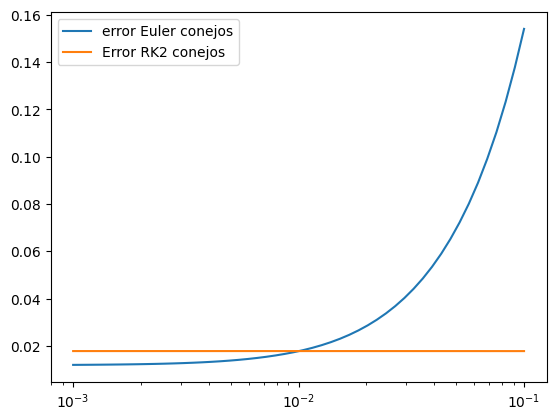

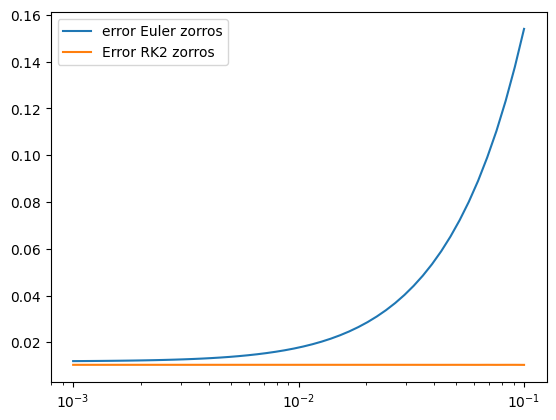

El error del método de Euler se ve mucho más influenciado al variar h


In [ ]:
def euler(F,X,x0,y0,h,t):
  X[:,0]=x0,y0
  for i in range(1, len(t)):
    X[:,i]=X[:,i-1]+h*F(t[i-1],X[:,i-1])
  return X

h=np.logspace(-3,-1)
erroreulerconejos=np.zeros_like(h)
erroreulerzorros=np.zeros_like(h)
errorrk2conejos=np.zeros_like(h)
errorrk2zorros=np.zeros_like(h)

for j in range(len(h)):
  t=np.arange(0,50,h[j])
  X=np.zeros((2,len(t)))

  c4,z4=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],t_eval=t).y[0],solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],t_eval=t).y[1]

  ce,ze=euler(F,X,x0,y0,h[j],t)[0],euler(F,X,x0,y0,h[j],t)[1]

  c2,z2=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],"RK23",t_eval=t).y[0],solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],"RK23",t_eval=t).y[1]

  erroreulerconejos[j]=np.mean(abs(c4-ce)/c4)  #Esta fue la forma que se me ocurrió para evaluar el error
  erroreulerzorros[j]=np.mean(abs(z4-ze)/z4)
  errorrk2conejos[j]=np.mean(abs(c4-c2)/c4)
  errorrk2zorros[j]=np.mean(abs(z4-z2)/z4)

plt.semilogx(h,erroreulerconejos,label="error Euler conejos")
plt.semilogx(h,errorrk2conejos, label="Error RK2 conejos")
plt.legend()
plt.show()

plt.semilogx(h,erroreulerconejos,label="error Euler zorros")
plt.semilogx(h,errorrk2zorros, label="Error RK2 zorros")
plt.legend()
plt.show()
print("El error del método de Euler se ve mucho más influenciado al variar h")

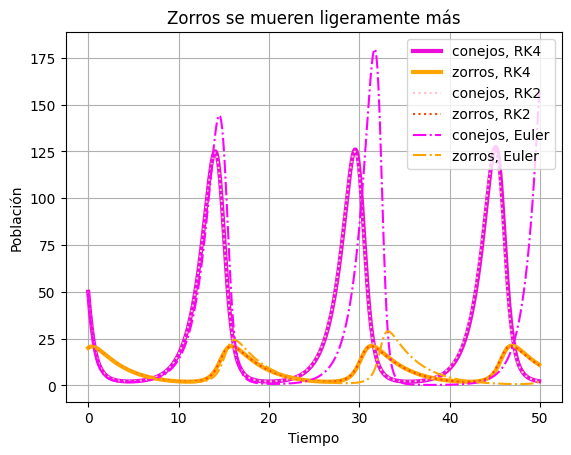

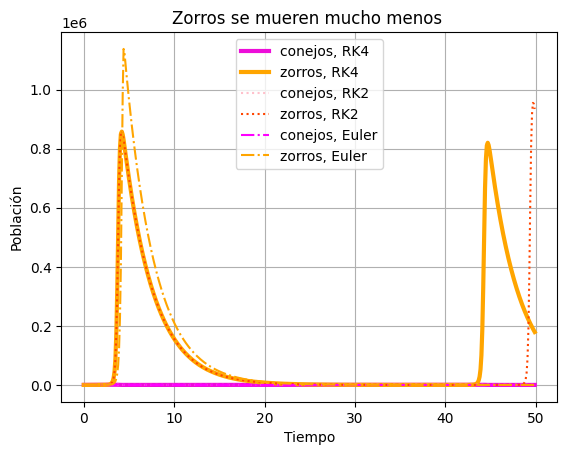

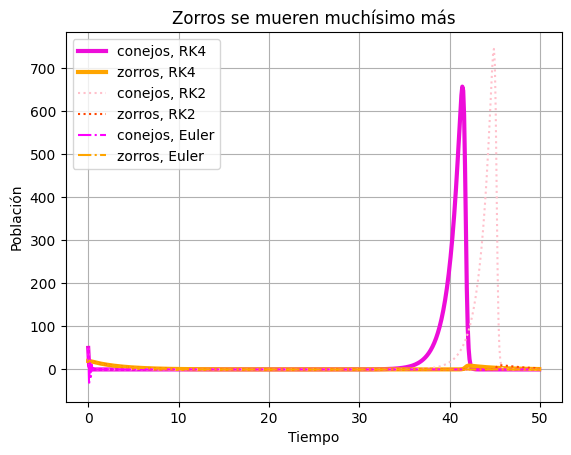

In [ ]:
alpha=0.8
beta=[0.1,0.00001, 0.9] #vamos a ver qué pasa cuando se mueren más o menos los zorros
gamma=0.3
delta=0.01
tit=["Zorros se mueren ligeramente más","Zorros se mueren mucho menos ", "Zorros se mueren muchísimo más"]
h=0.1

x0=50
y0=20

for b in range(len(beta)):
  def dinpob(t,X):
    x,y = X
    dxdt= alpha*x - beta[b]*x*y
    dydt= -gamma*y + delta*x*y
    return np.array([dxdt,dydt])

  t=np.arange(0,50,0.1)


  X=np.zeros((2,len(t)))
  X[:,0]=x0,y0


  for i in range(1, len(t)):
    X[:,i]=X[:,i-1]+h*dinpob(t[i-1],X[:,i-1])


  sol4=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],t_eval=t)
  sol2=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],"RK23",t_eval=t)

  plt.plot(t,sol4.y[0],linewidth=3, color="#ED0DD9", label="conejos, RK4")
  plt.plot(t,sol4.y[1],linewidth=3,color="#FFA500", label="zorros, RK4")
  plt.plot(t,sol2.y[0],linestyle=":", color="#FFC0CB", label="conejos, RK2")
  plt.plot(t,sol2.y[1],linestyle=":",color="#FF4500", label="zorros, RK2")
  plt.plot(t,X[0],linestyle="-.",color="#FF00FF", label="conejos, Euler")
  plt.plot(t,X[1],linestyle="-.",color="#FFA500", label="zorros, Euler")
  plt.xlabel("Tiempo")
  plt.ylabel("Población")
  plt.title(tit[b])
  plt.grid()
  plt.legend()
  plt.show()

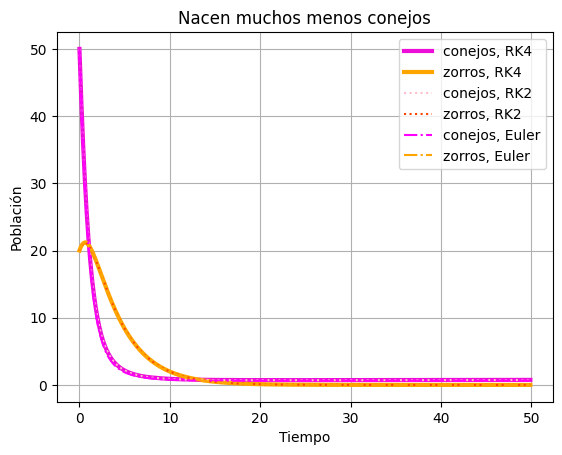

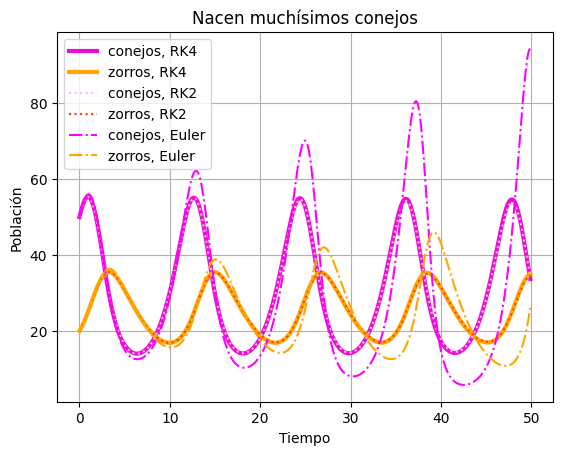

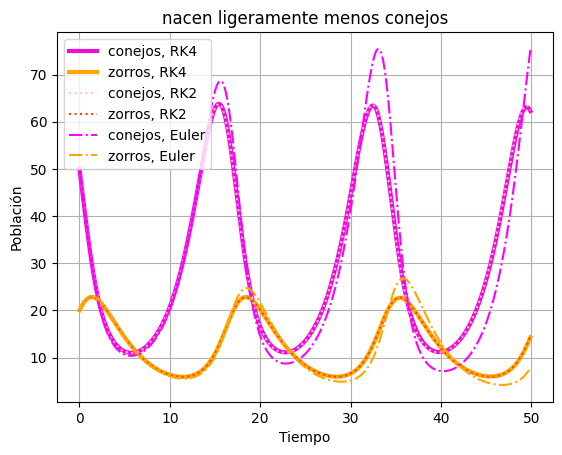

Si dejan de haber conejos también dejan de haber zorros
también parece que, paradójicamente, si nacen menos conejos terminan habiendo más, supongo que porque los zorros comen menos y se mueren más


In [ ]:
alpha=[0.002,1,0.5]
beta=0.04 #vamos a ver qué pasa cuando se mueren más o menos los zorros
gamma=0.3
delta=0.01
tit=["Nacen muchos menos conejos", "Nacen muchísimos conejos", "nacen ligeramente menos conejos"]
h=0.1

x0=50
y0=20

for b in range(len(alpha)):
  def dinpob(t,X):
    x,y = X
    dxdt= alpha[b]*x - beta*x*y
    dydt= -gamma*y + delta*x*y
    return np.array([dxdt,dydt])

  t=np.arange(0,50,0.1)


  X=np.zeros((2,len(t)))
  X[:,0]=x0,y0


  for i in range(1, len(t)):
    X[:,i]=X[:,i-1]+h*dinpob(t[i-1],X[:,i-1])


  sol4=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],t_eval=t)
  sol2=solve_ivp(dinpob,(t[0],t[-1]),[x0,y0],"RK23",t_eval=t)

  plt.plot(t,sol4.y[0],linewidth=3, color="#ED0DD9", label="conejos, RK4")
  plt.plot(t,sol4.y[1],linewidth=3,color="#FFA500", label="zorros, RK4")
  plt.plot(t,sol2.y[0],linestyle=":", color="#FFC0CB", label="conejos, RK2")
  plt.plot(t,sol2.y[1],linestyle=":",color="#FF4500", label="zorros, RK2")
  plt.plot(t,X[0],linestyle="-.",color="#FF00FF", label="conejos, Euler")
  plt.plot(t,X[1],linestyle="-.",color="#FFA500", label="zorros, Euler")
  plt.xlabel("Tiempo")
  plt.ylabel("Población")
  plt.title(tit[b])
  plt.grid()
  plt.legend()
  plt.show()

print("Si dejan de haber conejos también dejan de haber zorros")
print("también parece que, paradójicamente, si nacen menos conejos terminan habiendo más, supongo que porque los zorros comen menos y se mueren más")

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


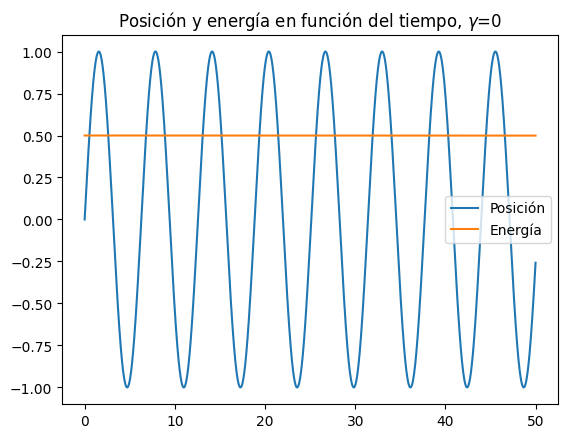

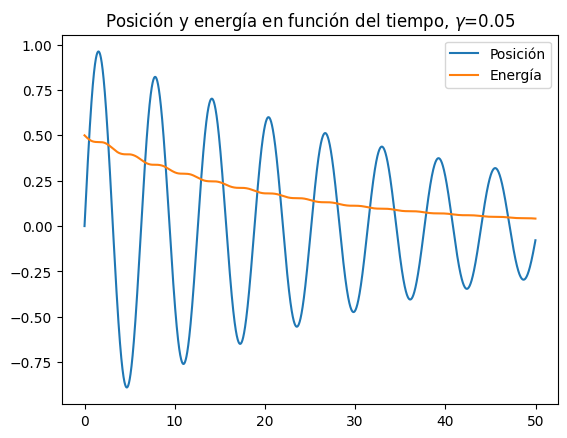

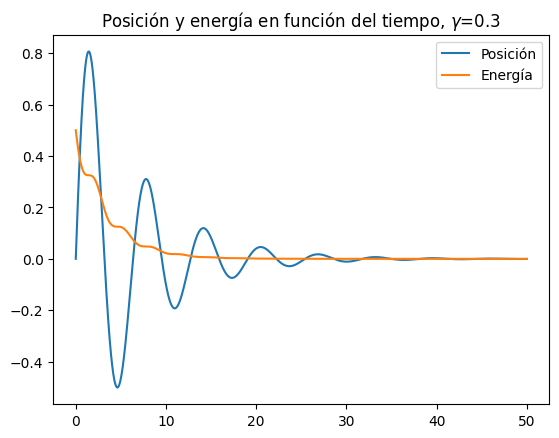

Se puede ver que entre mayor es la constante amortiguante más se pierde energía en el sistema


In [ ]:
def oscilador(F,k,m,gama,x0,xprima0,t0,tf,h):

  iniciales=np.array([x0,xprima0])

  def g(t,X):
    dX=np.zeros_like(X)  #Definiendo la función como matriz
    dX[0]=X[1]
    dX[1]=F/m-gama*X[1]-(k/m)*X[0]
    return dX

  t=np.arange(t0,tf,h)

  sol=solve_ivp(g,(t[0],t[-1]),iniciales,t_eval=t) #solucionando con solve_ivp
  x=sol.y[0]
  v=sol.y[1]
  E=(m*(v**2))/2 + (k*(x**2))/2

  plt.plot(t,x, label="Posición")
  plt.plot(t,E, label="Energía")
  plt.title(f"Posición y energía en función del tiempo, $\gamma$={gama}")
  plt.legend()
  plt.show()

gama=[0,0.05,0.3]

for i in gama:
  oscilador(0,1,1,i,0,1,0,50,0.01) #Escogí k,m = 1, porque no las especifican

print("Se puede ver que entre mayor es la constante amortiguante más se pierde energía en el sistema")

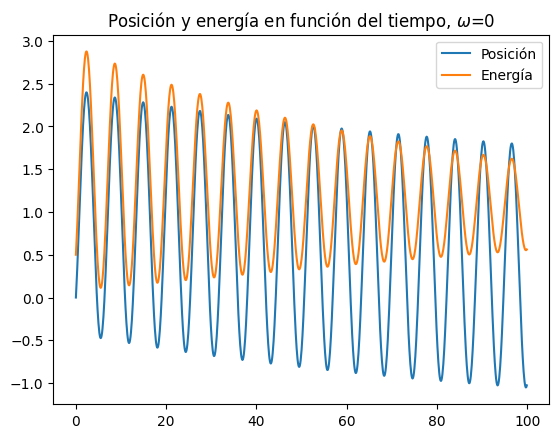

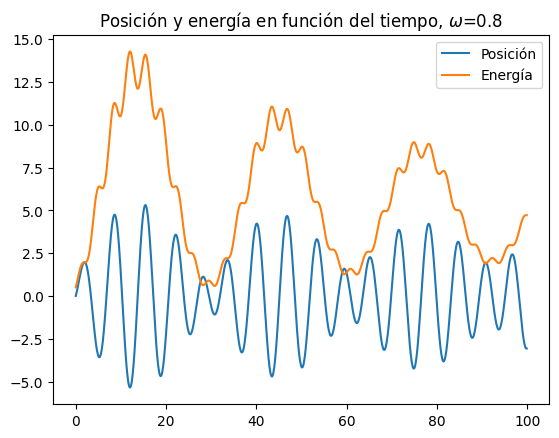

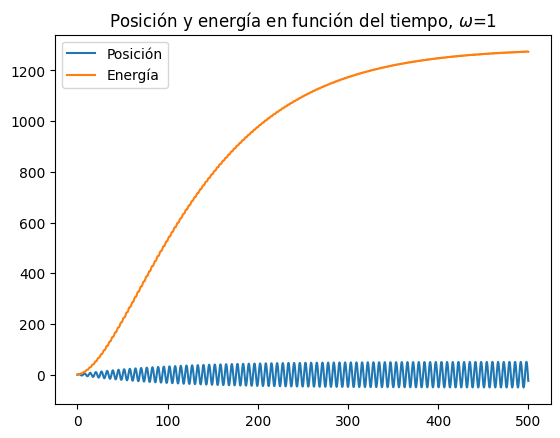

In [ ]:
def oscilador2(w,k,m,gama,x0,xprima0,t0,tf,h):

  wo=(k/m)**(1/2)
  gama=0
  T=10
  F0=1
  F=lambda t: F0*np.cos(w*t)*np.exp(-t/(T**2))

  iniciales=np.array([x0,xprima0])

  def g(t,X):
    dX=np.zeros_like(X)
    dX[0]=X[1]
    dX[1]=F(t)/m-gama*X[1]-(k/m)*X[0]
    return dX

  t=np.arange(t0,tf,h)

  sol=solve_ivp(g,(t[0],t[-1]),iniciales,t_eval=t)
  x=sol.y[0]
  v=sol.y[1]
  E=(m*(v**2))/2 + (k*(x**2))/2

  plt.plot(t,x, label="Posición")
  plt.plot(t,E, label="Energía")
  plt.title(f"Posición y energía en función del tiempo, $\omega$={w}")  #Hice todo lo mismo que en la celda enterior, solo que ahora gamma es constante y omega cambia
  plt.legend()
  plt.show()


w=[0,0.8]
for i in w:
  oscilador2(i,1,1,0,0,1,0,100,0.1)

oscilador2(1,1,1,0,0,1,0,500,0.1) #Hice este aparte porque necesitaba más tiempo para ver que la energía no estaba creciendo infinitamente

# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

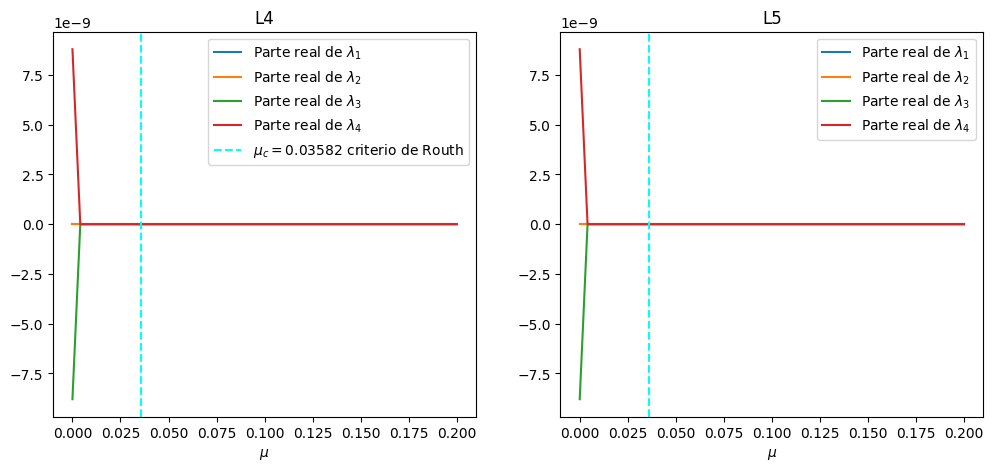

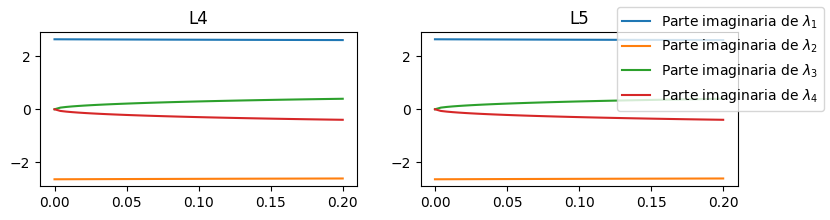

In [50]:
import sympy as sp


def estabilidad(mu):
  w=1
  L4x,L4y= 1/2-mu, (np.sqrt(3)/2)
  L5x,L5y= 1/2-mu, -(np.sqrt(3)/2)

  def r1(x,y):
    return np.sqrt((x+mu)**2+y**2)  #Estas funciones no las termino usando pero me parece bien dejarlas para que sea el paso a paso

  def r2(x,y):
    return np.sqrt((x-1+mu)**2+y**2)  #estas dos van a ser iguales

  def U(x,y):
    return - (mu/r1(x,y)) - ((1-mu)/r2(x,y)) - ((w**2)*(x**2 + y**2))/2

  x=sp.symbols("x")
  y=sp.symbols("y")

  fsympy= - (mu/(((x+mu)**2+y**2)**(1/2))) - ((1-mu)/ (((x-1+mu)**2 + y**2)**(1/2))) - ((w**2)*(x**2 + y**2))/2

  dfdx=sp.diff(fsympy,x)
  dfdy=sp.diff(fsympy,y)

  d2x=sp.diff(dfdx,x)
  d2y=sp.diff(dfdy,y)
  d2xy=sp.diff(dfdx,y)  #Estas últimas deberían ser iguales
  d2yx=sp.diff(dfdy,x)

  a4=sp.lambdify((x,y),d2x)(L4x,L4y)
  b4=sp.lambdify((x,y),d2xy)(L4x,L4y)  #toca evaluar las funciones en L4 y L5
  c4=sp.lambdify((x,y),d2yx)(L4x,L4y)
  d4=sp.lambdify((x,y),d2y)(L4x,L4y)

  a5=sp.lambdify((x,y),d2x)(L5x,L5y)
  b5=sp.lambdify((x,y),d2xy)(L5x,L5y)
  c5=sp.lambdify((x,y),d2yx)(L5x,L5y)
  d5=sp.lambdify((x,y),d2y)(L5x,L5y)

  A4=np.array([[0,1,0,0],
              [a4,0,b4,2],
              [0,0,0,1],
              [c4,-2,d4,0]], dtype=float)  #La matriz tal como la definen en el enunciado



  A5=np.array([[0,1,0,0],
              [a5,0,b5,2],
              [0,0,0,1],
              [c5,-2,d5,0]], dtype=float)

  vp1_l4,vp2_l4,vp3_l4,vp4_l4=la.eigvals(A4)
  vp1_l5,vp2_l5,vp3_l5,vp4_l5=la.eigvals(A5)

  return vp1_l4,vp2_l4,vp3_l4,vp4_l4,vp1_l5,vp2_l5,vp3_l5,vp4_l5

mu=np.linspace(0,0.2)

vp1_l4=np.zeros_like(mu)
vp2_l4=np.zeros_like(mu)
vp3_l4=np.zeros_like(mu)
vp4_l4=np.zeros_like(mu)
vp1_l5=np.zeros_like(mu)
vp2_l5=np.zeros_like(mu)
vp3_l5=np.zeros_like(mu)
vp4_l5=np.zeros_like(mu)

for i in range(len(mu)):
  valores=estabilidad(mu[i])
  vp1_l4[i]=np.real(valores[0])  #En este ciclo se definen arrays que van a tener un valor propio dependiendo del mu, esto para poder hacer la gráfica
  vp2_l4[i]=np.real(valores[1])
  vp3_l4[i]=np.real(valores[2])
  vp4_l4[i]=np.real(valores[3])
  vp1_l5[i]=np.real(valores[4])
  vp2_l5[i]=np.real(valores[5])
  vp3_l5[i]=np.real(valores[6])
  vp4_l5[i]=np.real(valores[7])



fig,ax=plt.subplots(1,2, figsize=(12,5))

ax[0].plot(mu,vp1_l4, label="Parte real de $\lambda _1$")
ax[0].plot(mu,vp2_l4, label="Parte real de $\lambda _2$")
ax[0].plot(mu,vp3_l4, label="Parte real de $\lambda _3$")
ax[0].plot(mu,vp4_l4, label="Parte real de $\lambda _4$")
ax[0].set(title="L4", xlabel="$\mu$")

ax[1].plot(mu,vp1_l5, label="Parte real de $\lambda _1$")
ax[1].plot(mu,vp2_l5, label="Parte real de $\lambda _2$")
ax[1].plot(mu,vp3_l5, label="Parte real de $\lambda _3$")
ax[1].plot(mu,vp4_l5, label="Parte real de $\lambda _4$")
ax[1].set(title="L5", xlabel="$\mu$")
ax[1].legend()
ax[0].axvline(0.03582, linestyle="--", color="cyan", label=f"$\mu _c = {0.03582}$ criterio de Routh")
ax[1].axvline(0.03582, linestyle="--", color="cyan")
ax[0].legend()

for i in range(len(mu)):
  valores=estabilidad(mu[i])
  vp1_l4[i]=np.imag(valores[0])  #lo copié y lo pegué todo para hacer ahora la gráfica con la parte imaginaria
  vp2_l4[i]=np.imag(valores[1])
  vp3_l4[i]=np.imag(valores[2])
  vp4_l4[i]=np.imag(valores[3])
  vp1_l5[i]=np.imag(valores[4])
  vp2_l5[i]=np.imag(valores[5])
  vp3_l5[i]=np.imag(valores[6])
  vp4_l5[i]=np.imag(valores[7])

fig,ax=plt.subplots(1,2, figsize=(9,2))

ax[0].plot(mu,vp1_l4, label="Parte imaginaria de $\lambda _1$")
ax[0].plot(mu,vp2_l4, label="Parte imaginaria de $\lambda _2$")
ax[0].plot(mu,vp3_l4, label="Parte imaginaria de $\lambda _3$")
ax[0].plot(mu,vp4_l4, label="Parte imaginaria de $\lambda _4$")
ax[0].set(title="L4")


ax[1].plot(mu,vp1_l5)
ax[1].plot(mu,vp2_l5)
ax[1].plot(mu,vp3_l5)
ax[1].plot(mu,vp4_l5)
ax[1].set(title="L5")
fig.legend()

#En conclusión, siempre tiene partes imaginarias, y las partes reales se va a cero muy rápido, entonces no se puede hacer realmente un estudio de la estabilidad, porque no hay propiamente un cambio de reales a complejos

# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


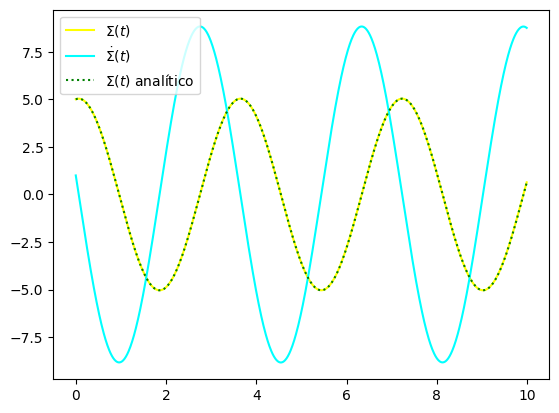

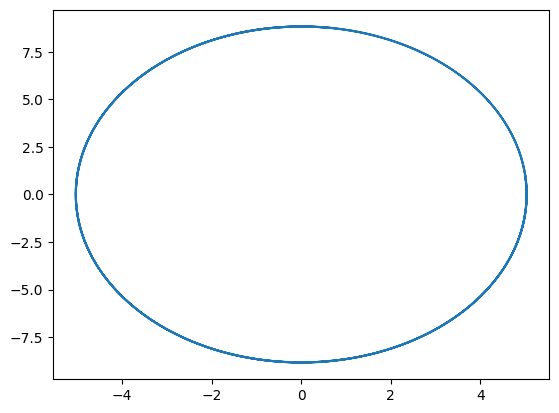

In [51]:
k=lambda r,v0:(2*(v0/r)**(1/2))
r=np.random.randint(0,100)  #r y V0 aleatorias, para modificar k
v0=np.random.randint(0,100)
def f(t,sigma):
  ds=np.zeros_like(sigma)
  ds[0]=sigma[1]
  ds[1]=-(k(r,v0)**2)*sigma[0]
  return ds
y0=np.random.randint(0,10,size=(2)) #Condiciones iniciales aleatorias
t=np.arange(0,10,0.01)

sol=solve_ivp(f,(t[0],t[-1]),y0=y0,t_eval=t)
anal=y0[0]*np.cos(k(r,v0)*t)+(y0[1]/k(r,v0))*np.sin(t*k(r,v0)) #Se obtiene la solución analítica analizando las condiciones iniciales del sistema, para sigma=Acos(wt)+Bsen(wt)

plt.plot(t,sol.y[0], color="yellow", label="$\Sigma (t)$")
plt.plot(t,sol.y[1], color="cyan", label="$\dot{\Sigma} (t)$")
plt.plot(t,anal, linestyle=":", color="g", label="$\Sigma (t)$ analítico")
plt.legend()
plt.show()
plt.plot(sol.y[0], sol.y[1])
plt.show()




A=np.array([[0,1],[-k(r,v0)**2,0]])
valores=la.eig(A)[0]


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.




































































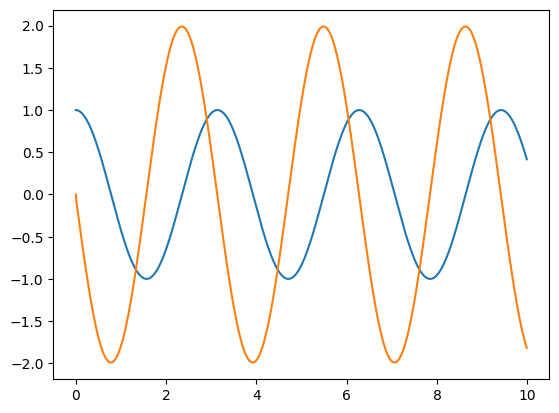

In [ ]:
def f(x):
 return -4*x

t=np.arange(0,10,0.01)

x=np.zeros_like(t)
x[0]=1

v=np.zeros_like(t)

v12=v[0]+0.01*f(x[0]) #Se tiene que definir el primero para que empieze el ciclo ya con un v12 para evaluar
for i in range(0,len(t)-1):
  x[i+1]=x[i]+0.01*v12
  v12=v12+0.01*f(x[i+1])
  v[i+1]=v12 - 0.01*v12/2 #se le resta ese v12 para que quede en un "número par de medios", por así decirlo, y sea una iteración entera de v
plt.plot(t,x)
plt.plot(t,v)
plt.show()



In [ ]:
x,v

(array([ 1.00000000e+00,  9.99600000e-01,  9.98800160e-01,  9.97600800e-01,
         9.96002400e-01,  9.94005598e-01,  9.91611195e-01,  9.88820147e-01,
         9.85633570e-01,  9.82052741e-01,  9.78079090e-01,  9.73714208e-01,
         9.68959840e-01,  9.63817888e-01,  9.58290409e-01,  9.52379614e-01,
         9.46087867e-01,  9.39417685e-01,  9.32371735e-01,  9.24952837e-01,
         9.17163958e-01,  9.09008213e-01,  9.00488866e-01,  8.91609322e-01,
         8.82373135e-01,  8.72783998e-01,  8.62845748e-01,  8.52562360e-01,
         8.41937946e-01,  8.30976758e-01,  8.19683179e-01,  8.08061726e-01,
         7.96117049e-01,  7.83853925e-01,  7.71277259e-01,  7.58392083e-01,
         7.45203549e-01,  7.31716935e-01,  7.17937633e-01,  7.03871157e-01,
         6.89523132e-01,  6.74899297e-01,  6.60005503e-01,  6.44847707e-01,
         6.29431972e-01,  6.13764464e-01,  5.97851450e-01,  5.81699295e-01,
         5.65314461e-01,  5.48703501e-01,  5.31873060e-01,  5.14829869e-01,
         4.9